<a href="https://colab.research.google.com/github/lynykercarvalho/Dio_Engenharia_De_Dados/blob/main/Lab03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prática de Histogramas

* Produza a imagem ‘negativa’ do arquivo ‘im_cells.png’

* Com a imagem negativa, produza a imagem original novamente.

* Mostre lado a lado a imagem original e a negativa. Em qual deles os objetos presentes na imagem são melhor percebidos? Justifique.

* Aplique a imagem uma função logarítmica.

In [1]:
# Importando as bibliotecas

import cv2
import numpy as np
import matplotlib.pyplot as plt

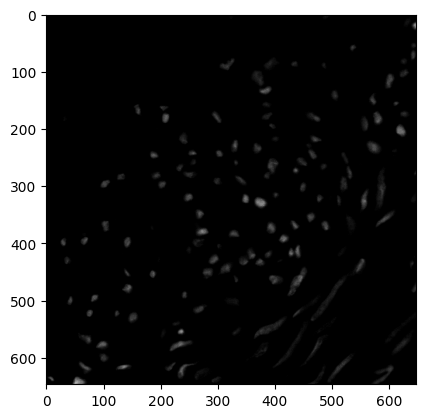

In [2]:
# Lendo a imagem
img = cv2.imread("im_cells.png", cv2.IMREAD_COLOR)
plt.imshow(img);

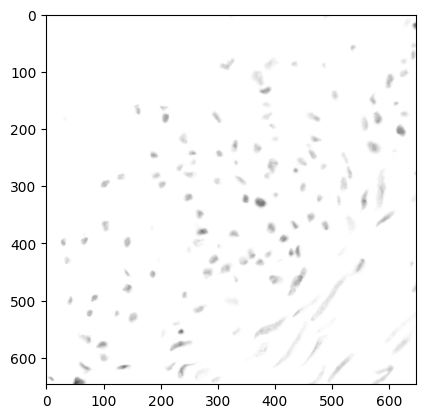

In [3]:
# Produzindo a imagem negativa
img_negativa = 255 - img
plt.imshow(img_negativa);

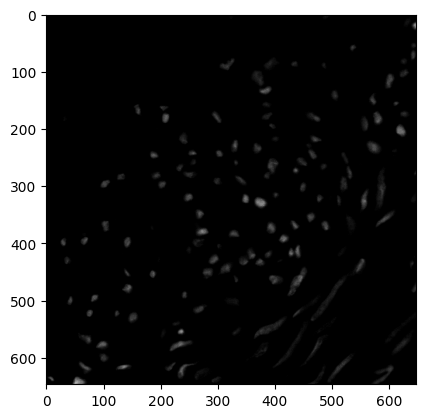

In [4]:
# Com a imagem negativa produzir a imagem original
img_original = 255 - img_negativa
plt.imshow(img_original);

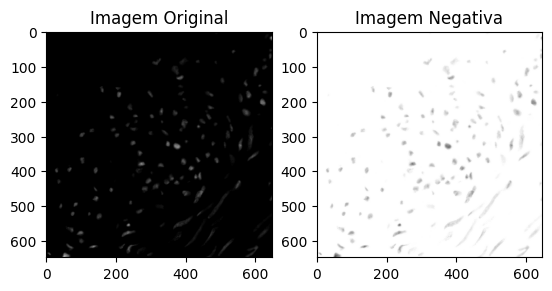

In [5]:
# Mostre lado a lado a imagem original e negativa. Em qual deles os objetos presentes na imagem são melhor percebidos? Justifique.
plt.subplot(1,2,1)
plt.title("Imagem Original")
plt.imshow(img_original);

# Agora trabalhar no segundo subplot

plt.subplot(1,2,2)
plt.title("Imagem Negativa")
plt.imshow(img_negativa);

plt.show()

Os objetos são melhores percebidos na imagem negativa, devido realçar os detalhes de brancos ou cinza incorporados nas regioes escura da imagem orinal.

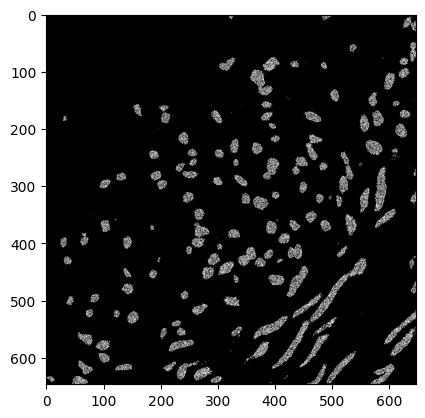

In [6]:
# Aplique a imagem uma função logarítmica.
# Aplicaremos a seguinte formula s =clog(1+r) de acordo com o livro:
# Processmento Digital de Imagens 3ed, Rafael C. Gonzalez e Richard E. Woods pag 71 eq 3.2-2.
# Sendo c uma constante, e r menor ou igual a 0.

c = 5
r = 0

img_log = c*np.log1p(img+r)
plt.imshow((img_log * 255).astype(np.uint8));

# Site usado :   https://stackoverflow.com/questions/49643907/clipping-input-data-to-the-valid-range-for-imshow-with-rgb-data-0-1-for-floa

# Devido ao erro :  WARNING:matplotlib.image:Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). <matplotlib.image.AxesImage at 0x7fc1608fc9d0>Error in callback <function _draw_all_if_interactive at 0x7fc19d00da20> (for post_execute):

Parte 2

* Abra a imagem 'pout.tif' e mostre seu histograma.
* Equalize a imagem anterior e mostre novamente seu histograma. Mostra a curva de transformação (consulte https://www.mathworks.com/help/images/histogram-equalization.html)

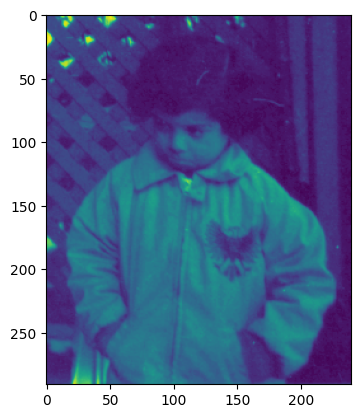

In [7]:
# Abrindo a imagem "pout.tif"

img2 = cv2.imread("pout.tif", cv2.IMREAD_GRAYSCALE)
plt.imshow(img2);

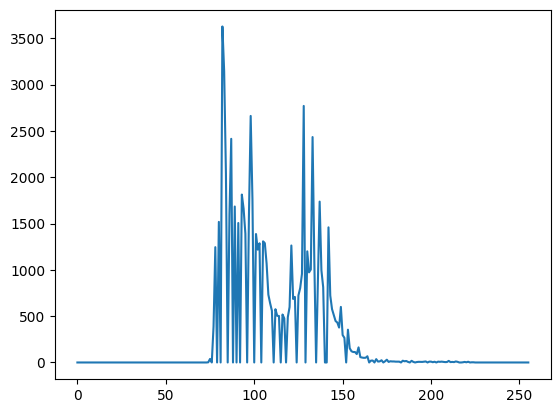

In [8]:
# Mostrando o histograma da imagem acima.
histograma = np.histogram(img2, bins = 256, range = (0,256))[0]
plt.plot(histograma);

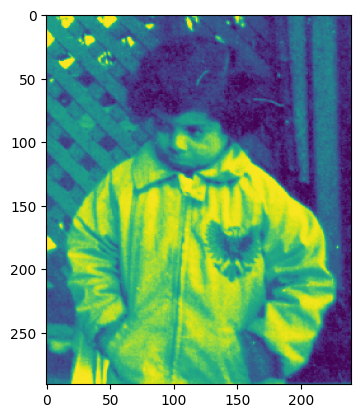

In [9]:
# Equalize a imagem anterior e mostre novamente seu histograma

cdf = histograma.cumsum()
cdf = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
cdf = cdf.astype('uint8')

img2_eq = cdf[img2]
plt.imshow(img2_eq);

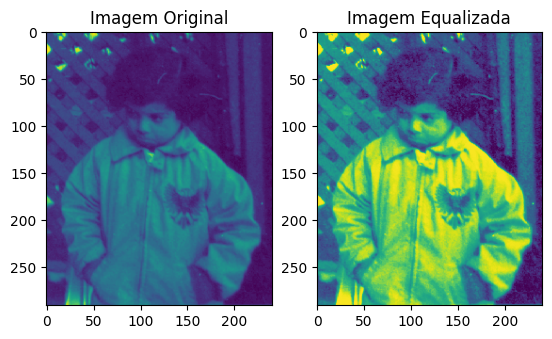

In [10]:
# Comparação das duas imagens original e equalizada

plt.subplot(1,2,1)
plt.title("Imagem Original")
plt.imshow(img2);

# Agora trabalhar no segundo subplot

plt.subplot(1,2,2)
plt.title("Imagem Equalizada")
plt.imshow(img2_eq);

plt.show()

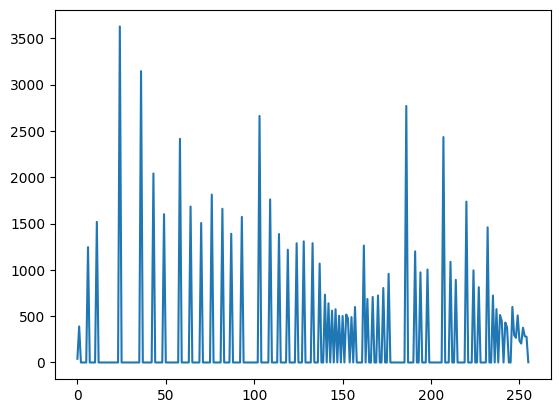

In [11]:
# Mostrado o histograma da segunda imagem

histograma_eq = np.histogram(img2_eq, bins = 256, range = (0,256))[0]
plt.plot(histograma_eq);

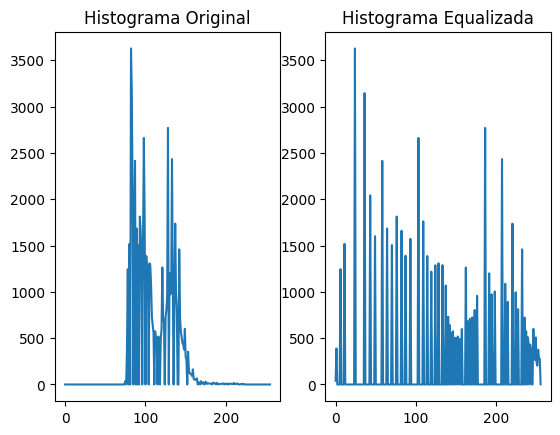

In [12]:
# Compração dos dois histogramas

plt.subplot(1,2,1)
plt.title("Histograma Original")
plt.plot(histograma);

# Agora trabalhar no segundo subplot

plt.subplot(1,2,2)
plt.title("Histograma Equalizada")
plt.plot(histograma_eq);

plt.show()

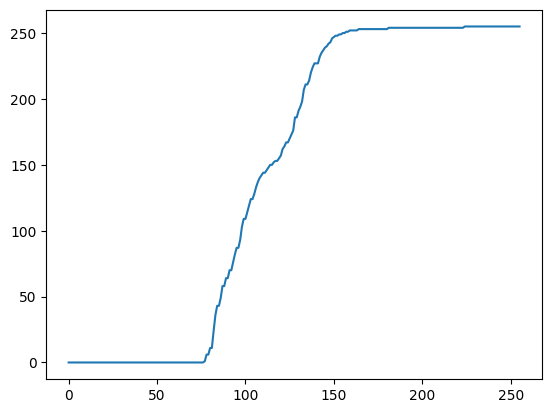

In [13]:
# Curva de transformação

plt.plot(cdf);

Parte 3

* Implemente o algoritmo de equalização de histograma e aplique a imagem ‘imcells.png’. Use o mínimos de laços for - tente realizar operações diretas com matrizes e vetores do numpy
* Aplique o mesmo algortimo 2x na mesma imagem e compare os resultados

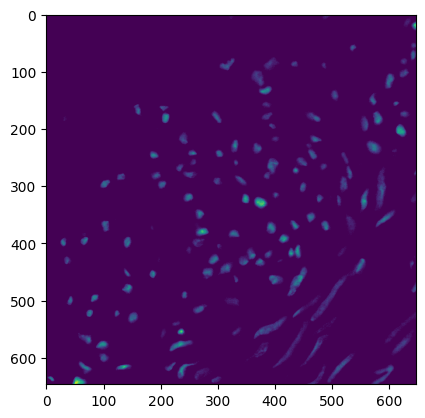

In [14]:
# Lendo a imagem

img3 = cv2.imread("im_cells.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(img3);

In [19]:
def equalizacao_histograma(imagem):
  # Calculando o histograma

  histogramad = np.histogram(imagem, bins = 256, range = (0,256))[0]

  # Calculando a função de distribuição cumulativa (CDF)

  cdf = histogramad.cumsum()
  cdf = (cdf - cdf.min() * 255 / (cdf.max() - cdf.min()))
  cdf = cdf.astype('uint8')

  # Equalizando a imagem

  imagem_eq = cdf[imagem]

  return plt.imshow(imagem_eq);




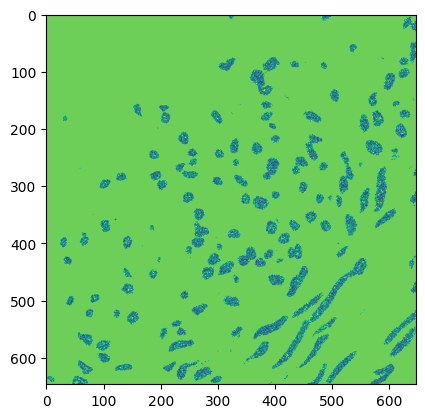

In [48]:
primeira = equalizacao_histograma(img3)
primeira

In [49]:
def equalizacao_histograma2(imagem):
  # Calculando o histograma

  histogramad = np.histogram(imagem, bins = 256, range = (0,256))[0]

  # Calculando a função de distribuição cumulativa (CDF)

  cdf = histogramad.cumsum()
  cdf = (cdf - cdf.min() * 255 / (cdf.max() - cdf.min()))
  cdf = cdf.astype('uint8')

  # Equalizando a imagem

  imagem_eq = cdf[imagem]
  imagem_eq2 = cdf[imagem_eq]

  return plt.imshow(imagem_eq2);


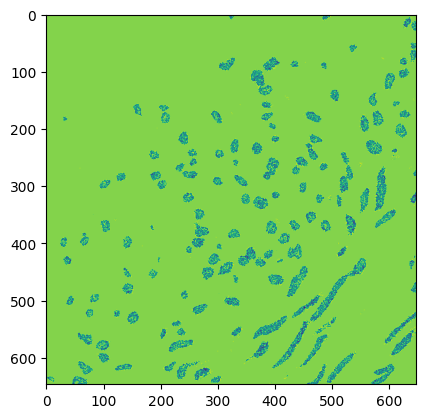

In [50]:
segunda = equalizacao_histograma2(img3)
segunda

Na segunda vez que passamos a imagem no filtro, nota-se uma pequena diferença na cor do fundo que esta mais claro e nas manchas estão mais claras, porem a diferença da imagem original e bem pouca.